# Klasyfikacja - zadania

## Regresja logistyczna

***Zadanie 1***

Wczytaj zbiór danych `winedataset.csv`. Wytrenuj model regresji logistycznej, która na podstawie parametrów wina określi czy jest ono białe, czy czerwone. Oblicz % poprawnych odpowiedzi.

---
(czas: 14 min.)

In [1]:
import pandas as pd

df = pd.read_csv("data/winedataset.csv").dropna()

df.insert(0, "IsWhite", df["type"].map(lambda x: x == "white").astype(int))
# df["IsWhite"] = df["type"].apply(lambda x: int(x == "white"))
df.drop("type", axis=1, inplace=True)

df

,IsWhite,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=10_000)

In [3]:
features = df.columns.to_list()[1:]

X = df[features]  # X = df.drop("IsWhite", axis=1)
y = df["IsWhite"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [4]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [5]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9835911861228317

In [6]:
iterations = [100, 200, 500, 800, 1000, 1500, 2000]
accuracies = []

for iter in iterations:
    
    model = LogisticRegression(max_iter=iter)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = (y_test == y_pred).mean()
    accuracies.append(acc)
    
accuracies

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

[0.9760900140646976,
 0.980309423347398,
 0.9831223628691983,
 0.9831223628691983,
 0.9835911861228317,
 0.9835911861228317,
 0.9835911861228317]

In [7]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)

# cross_val_score(model, X, y)
cross_val_score(model, X, y).mean()

0.9842173503911272

## Ewaluacja

***Zadanie 1***

Dokonaj ewaluacji modelu z powyższego zadania za pomocą wszystkich metryk, które znasz.

---
(czas: 3 min.)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(f'precision: {precision_score(y_test, y_pred)}')
print(f'recall: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')

confusion_matrix(y_test, y_pred)

accuracy: 0.9835911861228317
precision: 0.9845869297163995
recall: 0.9937772246421904
F1: 0.9891607308764323


array([[ 501,   25],
       [  10, 1597]])

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       526
           1       0.98      0.99      0.99      1607

    accuracy                           0.98      2133
   macro avg       0.98      0.97      0.98      2133
weighted avg       0.98      0.98      0.98      2133



***Zadanie 2***

Napisz funkcję, która przyjmie `y_test` oraz `y_pred` i zwróci wartości wszystkich metryk sukcesu klasyfikacji w postaci dataframe'a.

---
(czas: 6 min.)

In [10]:
def calculate_metrics(y_test, y_pred):

    return pd.DataFrame([accuracy_score(y_test, y_pred),
                         precision_score(y_test, y_pred),
                         recall_score(y_test, y_pred),
                         f1_score(y_test, y_pred)],
                     index=['accuracy', 'precision', 'recall', 'F1'], columns=['value'])
    
calculate_metrics(y_test, y_pred)

,value
accuracy,0.983591
precision,0.984587
recall,0.993777
F1,0.989161


## Drzewo decyzyjne

***Zadanie 1***

Wytrenuj drzewo decyzyjne na danych z pliku `loan_dataset.csv`. W ramach przygotowania danych wykonaj następujące czynności:
- wczytując dane usuń NaNy i zresetuj indeks
- usuń zmienną `Loan_ID`
- zamień cechy `Gender`, `Married`, `Education` i `Self_Employed` na zmienne binarne
- zamień target (`Loan_Status`) na zmienną binarną
- *label encoding* zmiennej `Property_Area`

Poeksperymentuj z parametrami modelu.

---
(czas: 30 min.)

In [11]:
df2 = pd.read_csv("data/loan_dataset.csv").dropna().reset_index(drop=True)
df2.drop("Loan_ID", axis=1, inplace=True)

df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1.0,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0.0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2.0,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
475,Female,No,0.0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
476,Male,Yes,3.0,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
477,Male,Yes,1.0,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
478,Male,Yes,2.0,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df2["Gender"] = df2["Gender"].apply(lambda x: int(x == "Male"))
df2["Married"] = df2["Married"].apply(lambda x: int(x == "Yes"))
df2["Education"] = df2["Education"].apply(lambda x: int(x == "Graduate"))
df2["Self_Employed"] = df2["Self_Employed"].apply(lambda x: int(x == "Yes"))

df2["Loan_Status"] = df2["Loan_Status"].apply(lambda x: int(x == "Y"))

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,Rural,0
1,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,Urban,1
2,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,Urban,1
3,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,Urban,1
4,1,1,2.0,1,1,5417.0,4196.0,267.0,360.0,1.0,Urban,1


In [13]:
# label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit_transform(df2["Property_Area"])

df2["Property_Area"] = le.transform(df2["Property_Area"])
df2.head()

# inny sposób
# df2["Property_Area"] = df2["Property_Area"].astype("category").cat.codes

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1,1,2.0,1,1,5417.0,4196.0,267.0,360.0,1.0,2,1


In [14]:
X = df2.drop("Loan_Status", axis=1)
y = df2["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# model = DecisionTreeClassifier()
model = DecisionTreeClassifier(max_depth=2)  # najlepszy model znaleziony dla różnych wartości 'test_size'

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

calculate_metrics(y_test, y_pred)

,value
accuracy,0.840278
precision,0.823529
recall,0.980000
F1,0.894977


In [16]:
cross_val_score(model, X, y, cv=10).mean()

0.7958333333333333

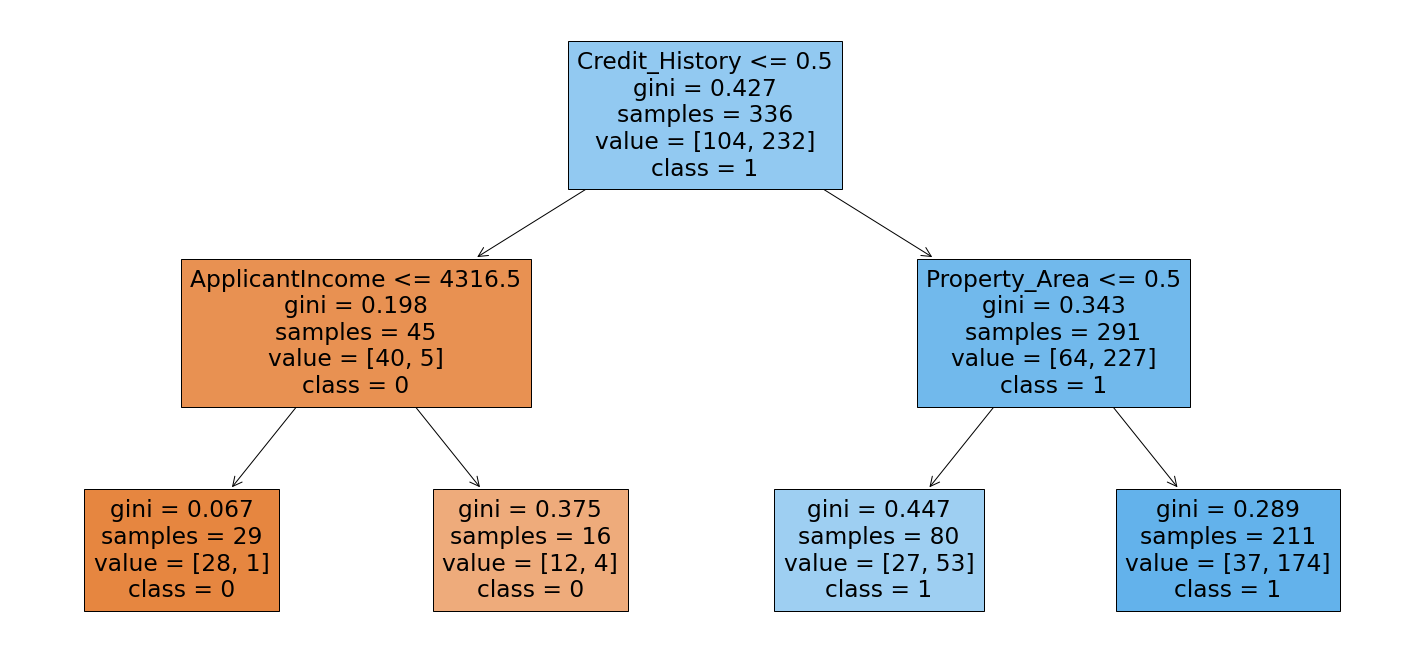

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 12))
plot_tree(model, feature_names=model.feature_names_in_, class_names=model.classes_.astype('str'), filled=True);

***Zadanie 2***

Dla powyższego modelu zwizualizuj ścieżkę decyzyjną dla poniższej osoby

---
(czas: 5 min.)

In [18]:
X_test_single = np.array([[1, 1, 2, 1, 0, 5500, 4500, 100, 240, 1, 1]])
decision_path = model.decision_path(X_test_single)

/home/mdabrowski-phd/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


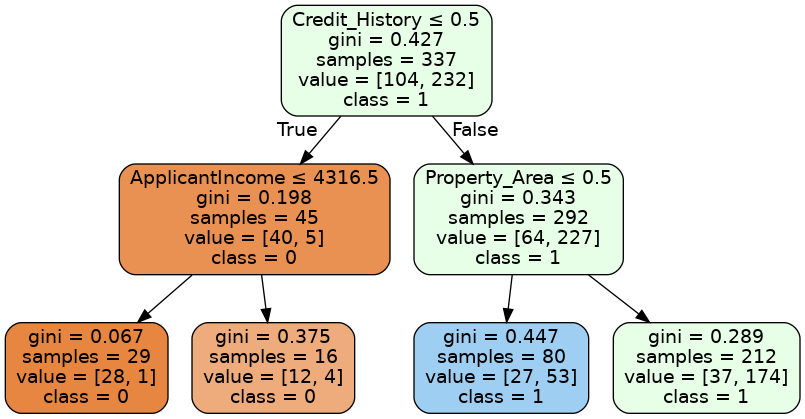

In [19]:
from sklearn import tree
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=model.feature_names_in_,
                                class_names=model.classes_.astype(str),
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

for n, node_value in enumerate(decision_path.toarray()[0]):
    
    if node_value == 0:
        continue
    
    node = graph.get_node(str(n))[0]            
    node.set_fillcolor('#e6ffe6')
    labels = node.get_attributes()['label'].split('<br/>')
    
    for i, label in enumerate(labels):
        if label.startswith('samples = '):
            labels[i] = f"samples = {int(label.split('=')[1]) + 1}"

    node.set('label', '<br/>'.join(labels))
    
Image(graph.create_png())

## Naiwny klasyfikator Bayesa

***Zadanie 1***

Wytrenuj model `NBC` dla danych z zadania *Regresja logistyczna → Zadanie 1*. Porównaj skuteczność obu modeli.

---
(czas: 8 min.)

In [20]:
import pandas as pd

df = pd.read_csv("data/winedataset.csv").dropna()

df["IsWhite"] = df["type"].apply(lambda x: int(x == "white"))
df.drop("type", axis=1, inplace=True)

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,IsWhite
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,0
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [21]:
X = df.drop("IsWhite", axis=1)
y = df["IsWhite"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [22]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

model_mnb = MultinomialNB()
model_gnb = GaussianNB()
model_bnb = BernoulliNB()

y_pred_dict = {}
accuracy_dict = {}

for model, model_name in zip([model_mnb, model_gnb, model_bnb], ["MNB", "GNB", "BNB"]):
    
    model.fit(X_train, y_train)
    y_pred_dict[model_name] = model.predict(X_test)
    accuracy_dict[model_name] = accuracy_score(y_test, y_pred_dict[model_name])
    
accuracy_dict  # zgodnie z założeniami modelu, najlepiej działa klasyfikator GaussianNB

{'MNB': 0.9254571026722925,
 'GNB': 0.9695264885138303,
 'BNB': 0.7716830754805438}

***Zadanie 2***

Wytrenuj model `NBC` dla danych z zadania *Drzewo decyzyjne → Zadanie 1*. Porównaj skuteczność obu modeli.

---
(czas: 6 min.)

In [23]:
df2 = pd.read_csv("data/loan_dataset.csv").dropna().reset_index(drop=True)
df2.drop("Loan_ID", axis=1, inplace=True)

df2["Gender"] = df2["Gender"].apply(lambda x: int(x == "Male"))
df2["Married"] = df2["Married"].apply(lambda x: int(x == "Yes"))
df2["Education"] = df2["Education"].apply(lambda x: int(x == "Graduate"))
df2["Self_Employed"] = df2["Self_Employed"].apply(lambda x: int(x == "Yes"))

df2["Loan_Status"] = df2["Loan_Status"].apply(lambda x: int(x == "Y"))

df2["Property_Area"] = df2["Property_Area"].astype("category").cat.codes

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1,1,2.0,1,1,5417.0,4196.0,267.0,360.0,1.0,2,1


In [24]:
X = df2.drop("Loan_Status", axis=1)
y = df2["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

model_mnb = MultinomialNB()
model_gnb = GaussianNB()
model_bnb = BernoulliNB()

y_pred_dict = {}
metrics_dict = {}

for model, model_name in zip([model_mnb, model_gnb, model_bnb], ["MNB", "GNB", "BNB"]):
    
    model.fit(X_train, y_train)
    y_pred_dict[model_name] = model.predict(X_test)
    accuracy_dict[model_name] = calculate_metrics(y_test, y_pred_dict[model_name])
    
accuracy_dict

{'MNB':               value
 accuracy   0.493056
 precision  0.695652
 recall     0.480000
 F1         0.568047,
 'GNB':               value
 accuracy   0.833333
 precision  0.833333
 recall     0.950000
 F1         0.887850,
 'BNB':               value
 accuracy   0.812500
 precision  0.828829
 recall     0.920000
 F1         0.872038}

## SVM

***Zadanie 1***

Wczytaj dane `iris.csv`, które zawierają przykłady obserwacji trzech gatunków irysa wraz z ich rozmiarami. Użyj ich do wytrenowania klasyfikatora `SVM`, który będzie rozpoznawał te gatunki. Sprawdź jak zmiana kernela wpływa na dokładność wyników.

Podpowiedź: zastosuj label encoding dla zmiennej docelowej i upewnij się że jest ona typu numerycznego

---
(czas: 12 min.)

In [43]:
df = pd.read_csv('data/iris.csv')
df["species"] = df["species"].astype("category").cat.codes
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [45]:
X, y = df.drop(["species"], axis=1), df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [62]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
#model = SVC(C=0.07)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'#vectors: {len(model.support_vectors_)}')

accuracy_score(y_test, y_pred)

#vectors: 22


1.0

In [65]:
cross_val_score(model, X, y, cv=10).mean()

0.9733333333333334

In [68]:
# porównanie: regresja logistyczna

model = LogisticRegression()  # C=0.1

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [76]:
# porównanie: drzewo decyzyjne

model = DecisionTreeClassifier()  # max_depth=2

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.98

## KNN

***Zadanie 1***

Wytrenuj algorytm do klasyfikacji irysów, tym razem za pomocą `KNN`. Wypróbuj różne wartości parametru `k`. 

---
(czas: 4 min.)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()  # n_neighbors=12
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.98

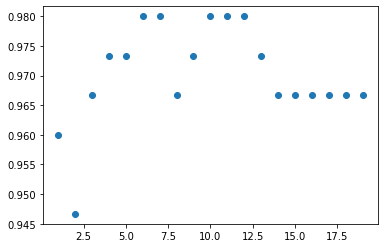

In [97]:
scores = []
k_list = range(1, 20)

for k in k_list:
    
    model = KNeighborsClassifier(n_neighbors=k)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # score = accuracy_score(y_test, y_pred)
    score = cross_val_score(model, X, y).mean()

    scores.append(score)
    
plt.scatter(k_list, scores);

## Ensembles

***Zadanie 1***

Wytrenuj las losowy, który będzie decydował o przyznaniu kredytu na zbiorze `loan_dataset`. Wypróbuj różne wartości parametru `n_estimators` oraz `max_depth`. Wybierz najważniejszą metrykę - według własnego uznania - i wyznacz macierz, w której będą wartości tej metryki dla poszczególnych kombinacji parametrów `n_estimators` oraz `max_depth`. Znajdź najbardziej optymalną kombinację.

---
(czas: 18 min.)

In [98]:
df2 = pd.read_csv("data/loan_dataset.csv").dropna().reset_index(drop=True)
df2.drop("Loan_ID", axis=1, inplace=True)

df2["Gender"] = df2["Gender"].apply(lambda x: int(x == "Male"))
df2["Married"] = df2["Married"].apply(lambda x: int(x == "Yes"))
df2["Education"] = df2["Education"].apply(lambda x: int(x == "Graduate"))
df2["Self_Employed"] = df2["Self_Employed"].apply(lambda x: int(x == "Yes"))

df2["Loan_Status"] = df2["Loan_Status"].apply(lambda x: int(x == "Y"))

df2["Property_Area"] = df2["Property_Area"].astype("category").cat.codes

df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.0,1,0,4583.0,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
4,1,1,2.0,1,1,5417.0,4196.0,267.0,360.0,1.0,2,1


In [99]:
X, y = df2.drop("Loan_Status", axis=1), df2["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [100]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=1000, max_depth=4, criterion='entropy', max_features='sqrt',
                               random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8333333333333334

In [131]:
params = {"n_estimators": np.arange(1, 10, 1), "max_depth": [1, 2, 3, 4, 5]}
best_values = np.zeros([len(params["n_estimators"]), len(params["max_depth"])])

best_score = 0
optimal_n = None
optimal_depth = None

for i, n in enumerate(params["n_estimators"]):
    for j, depth in enumerate(params["max_depth"]):
        
        model = RandomForestClassifier(n_estimators=n, max_depth=depth,
                                       criterion='entropy', max_features='sqrt', random_state=0)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        
        best_values[i, j] = score
        
        if score > best_score:
            
            best_score = score
            optimal_n = n
            optimal_depth = depth
            
print(f"Best accuracy: {round(best_score, 2)}. Optimal n_estimators: {optimal_n}. Optimal max_depth: {optimal_depth}")

Best accuracy: 0.85. Optimal n_estimators: 6. Optimal max_depth: 3


In [134]:
pd.DataFrame(best_values, index=params["n_estimators"], columns=params["max_depth"])

,1,2,3,4,5
1,0.840278,0.840278,0.826389,0.798611,0.770833
2,0.840278,0.840278,0.826389,0.798611,0.756944
3,0.840278,0.840278,0.840278,0.826389,0.812500
4,0.840278,0.840278,0.840278,0.819444,0.819444
5,0.840278,0.840278,0.840278,0.840278,0.833333
6,0.840278,0.840278,0.847222,0.840278,0.833333
7,0.840278,0.840278,0.840278,0.833333,0.833333
8,0.840278,0.840278,0.840278,0.840278,0.833333
9,0.840278,0.840278,0.840278,0.840278,0.840278


In [118]:
best_model = RandomForestClassifier(n_estimators=optimal_n, max_depth=optimal_depth,
                                    criterion='entropy', max_features='sqrt', random_state=0)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

calculate_metrics(y_test, y_pred)

,value
accuracy,0.847222
precision,0.830508
recall,0.980000
F1,0.899083


In [145]:
# inny sposób

from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [50, 100, 150], "criterion": ["gini", "entropy"]}

model = RandomForestClassifier()
gs = GridSearchCV(model, param_grid, cv=5)

gs.fit(X_train, y_train)

print(f'accuracy: {accuracy_score(y_test, y_pred)}')
print(gs.best_params_)

accuracy: 0.8472222222222222
{'criterion': 'entropy', 'n_estimators': 100}


***Zadanie 2***

Wykonaj podobne zadanie jak powyżej, ale dla modelu `GradientBoostingClassifier`

---
(czas: 3 min.)

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=1000, max_depth=2,
                                   learning_rate=0.01, max_features='sqrt', random_state=0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.8472222222222222

In [136]:
params = {"n_estimators": np.arange(50, 100, 1), "max_depth": [1, 2, 3, 4, 5]}
best_values = np.zeros([len(params["n_estimators"]), len(params["max_depth"])])

best_score = 0
optimal_n = None
optimal_depth = None

for i, n in enumerate(params["n_estimators"]):
    for j, depth in enumerate(params["max_depth"]):
        
        model = GradientBoostingClassifier(n_estimators=n, max_depth=depth,
                                   learning_rate=0.01, max_features='sqrt', random_state=0)
        
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        
        best_values[i, j] = score
        
        if score > best_score:
            
            best_score = score
            optimal_n = n
            optimal_depth = depth
            
print(f"Best accuracy: {round(best_score, 2)}. Optimal n_estimators: {optimal_n}. Optimal max_depth: {optimal_depth}")

Best accuracy: 0.85. Optimal n_estimators: 83. Optimal max_depth: 3


In [137]:
pd.DataFrame(best_values, index=params["n_estimators"], columns=params["max_depth"])

,1,2,3,4,5
50,0.694444,0.694444,0.694444,0.736111,0.791667
51,0.694444,0.694444,0.701389,0.743056,0.798611
52,0.694444,0.694444,0.701389,0.743056,0.805556
53,0.694444,0.694444,0.701389,0.743056,0.805556
54,0.694444,0.694444,0.708333,0.750000,0.805556
55,0.694444,0.694444,0.701389,0.763889,0.812500
56,0.694444,0.694444,0.708333,0.777778,0.805556
57,0.694444,0.694444,0.722222,0.791667,0.812500
58,0.694444,0.694444,0.722222,0.798611,0.812500
59,0.694444,0.694444,0.750000,0.798611,0.819444


In [138]:
best_model = GradientBoostingClassifier(n_estimators=optimal_n, max_depth=optimal_depth,
                                   learning_rate=0.01, max_features='sqrt', random_state=0)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

calculate_metrics(y_test, y_pred)

,value
accuracy,0.847222
precision,0.825000
recall,0.990000
F1,0.900000
